<a href="https://colab.research.google.com/github/TJ1810/Sentiment-analysis/blob/main/Supervised_Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'sarif'
%config inlineBackend.figure_format'svg'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FuelConsumptionCo2.csv to FuelConsumptionCo2 (2).csv


In [ ]:
df = pd.read_csv("FuelConsumptionCo2.csv")

NameError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [ ]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [ ]:
df.describe().round(2)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.00,1067.00,1067.00,1067.00,1067.00,1067.00,1067.00
mean,2014.0,3.35,5.79,13.30,9.47,11.58,26.44,256.23
std,0.0,1.42,1.80,4.10,2.79,3.49,7.47,63.37
min,2014.0,1.00,3.00,4.60,4.90,4.70,11.00,108.00
25%,2014.0,2.00,4.00,10.25,7.50,9.00,21.00,207.00
50%,2014.0,3.40,6.00,12.60,8.80,10.90,26.00,251.00
75%,2014.0,4.30,8.00,15.55,10.85,13.35,31.00,294.00
max,2014.0,8.40,12.00,30.20,20.50,25.80,60.00,488.00


In [ ]:
df2=df[["ENGINESIZE", "CO2EMISSIONS"]]

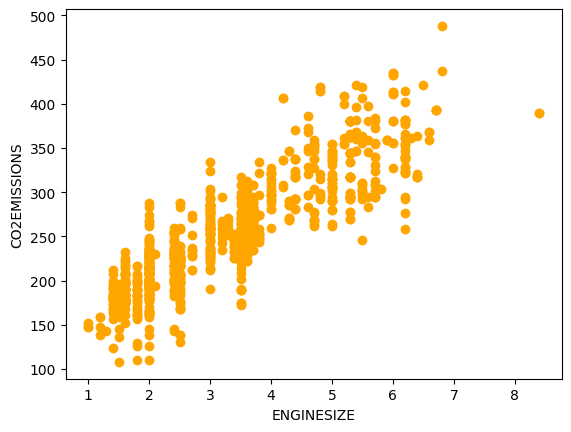

In [ ]:
plt.scatter(df2["ENGINESIZE"], df2["CO2EMISSIONS"], color="orange") #Create a scatter plot
plt.xlabel("ENGINESIZE")        #Set the x-axis label
plt.ylabel("CO2EMISSIONS")      #Set the y-axis label
plt.show()                      #Display the scatter plot

In [ ]:
train = df2[:(int((len(df2)*0.8)))]     #Split the dataframe into training and test sets
test = df2[(int((len(df2)*0.8))):]

In [ ]:
regr = linear_model.LinearRegression()       #Create a linear regression model

train_x=np.array(train[['ENGINESIZE']])      #Prepare the training data
train_y=np.array(train[['CO2EMISSIONS']])

regr.fit(train_x, train_y)                     #Train the linear regression model

print ("coefficients :",regr.coef_)
print ("Intercept :",regr.intercept_)

coefficients : [[38.79512384]]
Intercept : [127.16989951]


Text(0, 0.5, 'Emission')

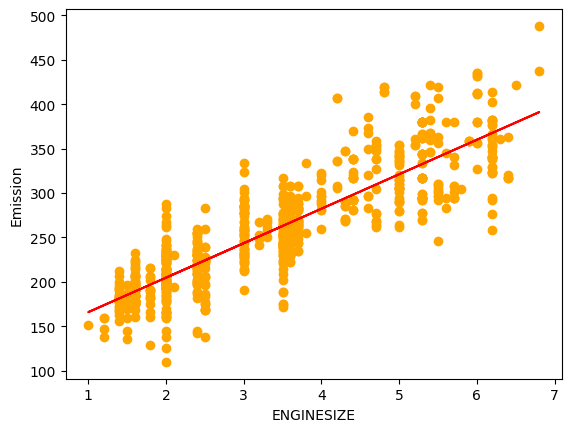

In [ ]:
plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"], color="orange")  #Create a scatter plot of the training data
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')             #Plot the regression line
plt.xlabel("ENGINESIZE")       #Set the x-axis label
plt.ylabel("Emission")         #Set the y-axis label

In [ ]:
def get_regression_predictions(Input_features,intercept,slope): #predicted value : #Function for prediction value
  predicted_values = Input_features*slope + intercept

  return predicted_values

In [ ]:
from sklearn.metrics import r2_score

test_x = np.array(test[['ENGINESIZE']])         #Prepare the test data
test_y = np.array(test[['CO2EMISSIONS']])       #Make predictions on the test data using the trained model
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))    #Calculate and print the mean absolute error,sum of squares (MSE),R2-score
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )


Mean absolute error: 20.60
Mean sum of squares (MSE): 0.00
R2-score: 0.71
